<img src="header.jpg" width="100%"/>

# Regressão Linear para entender correlação entre features e fazer previsões

## Objetivo
Utilizar o dataset 50_Startups.csv e entender a correlação entre as features e o Profit. Realizar também simulações com valores de features para prever o Profit.

## Importação de bibliotcas

In [494]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")

In [495]:
df = pd.read_csv('50_Startups.csv')

In [496]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


As colunas já estão no tipo certo.

In [498]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [499]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Não temos valores nulos.

In [500]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [501]:
df.duplicated().sum()

0

Não temos valores duplicados.

### Contagem de valores de features numéricas

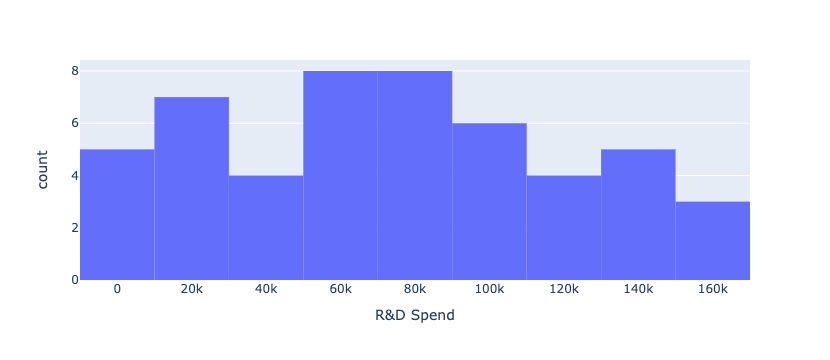

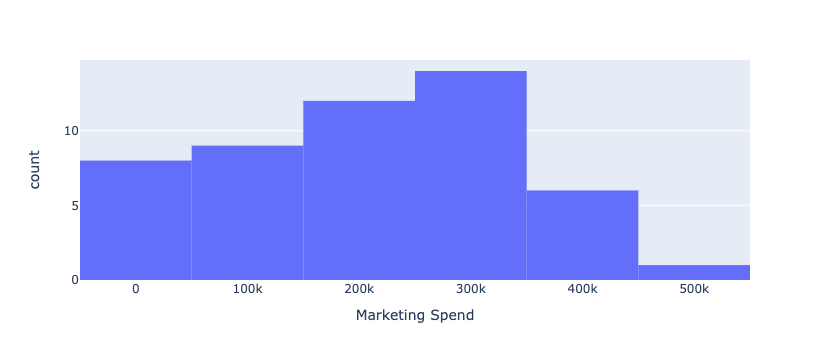

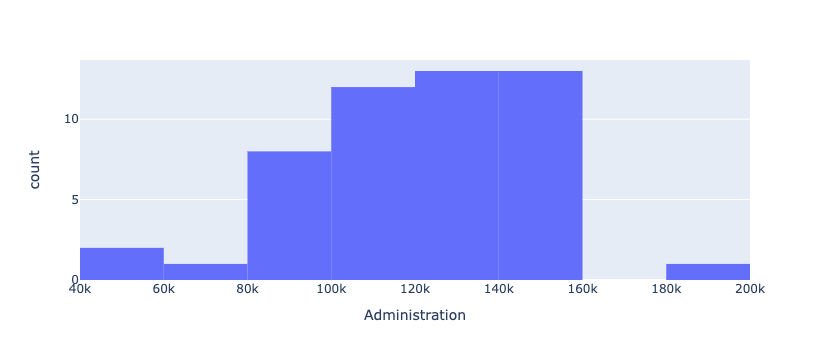

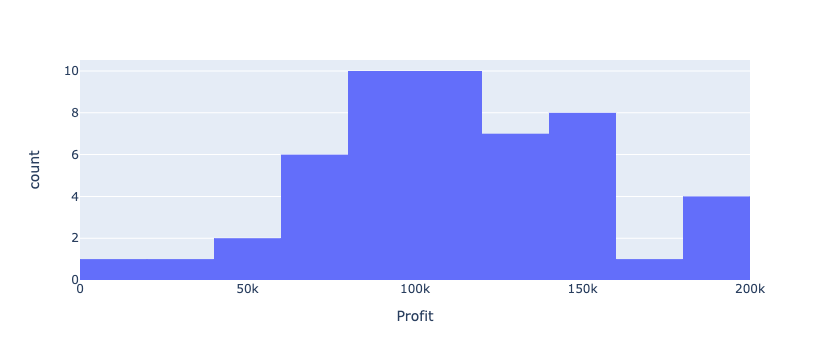

In [502]:
df_numerico = df['R&D Spend'],df['Marketing Spend'],df['Administration'],df['Profit']

for i in df_numerico:
    fig = px.histogram(df, x = i)
    fig.show()

### Plotando correlações

<AxesSubplot:>

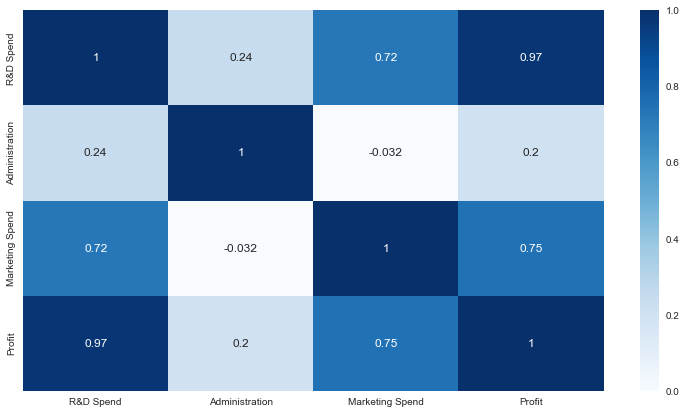

In [503]:
corr=df.corr()
plt.figure(figsize=(13,7))  
sns.heatmap(corr,annot=True, cmap="Blues",vmax=1,vmin=0)

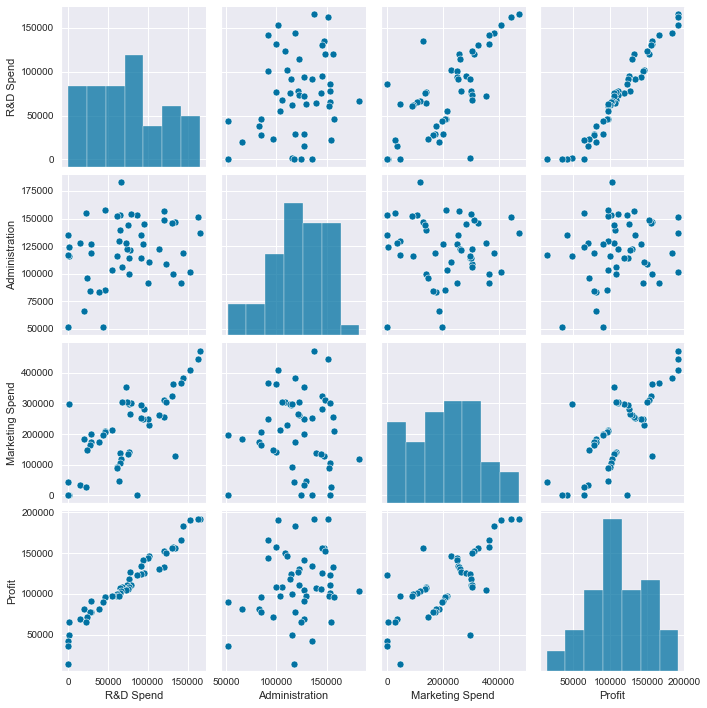

In [504]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

R&D Spend e Marketing Spend possuem grande correlação com Profit, vamos iniciar a regressão linear simples com R&D Spend e depois usar Marketing Spend junto com ela na regressão linear múltipla.

## Regressão Linear Simples

### Criando X e y, sendo X o investimento em R&D e y a variável dependente o Profit

In [505]:
X = df['R&D Spend'].values
y = df['Profit'].values
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

### Criando no formato de matriz, instanciação e fitting

In [506]:
X = X.reshape(-1, 1) 
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [507]:
#Intercept
print(f'Intercept: {modelo.intercept_}')
#Slope
print(f'Slope: {modelo.coef_}')

Intercept: 49032.89914125215
Slope: [0.85429137]


### Plotando Previsões e valores Reais

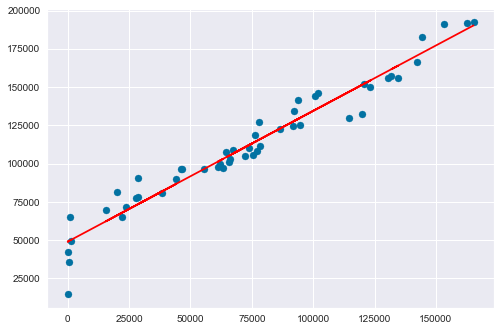

In [508]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

### Prevendo o valor de Profit com investimento de 150.000 em R&D

In [509]:
print(f'Profit de {modelo.predict([[150000]])}')
#Outra opção: modelo.intercept_ + modelo.coef_ * 150000

Profit de [177176.60478207]


### Plotando Residuals

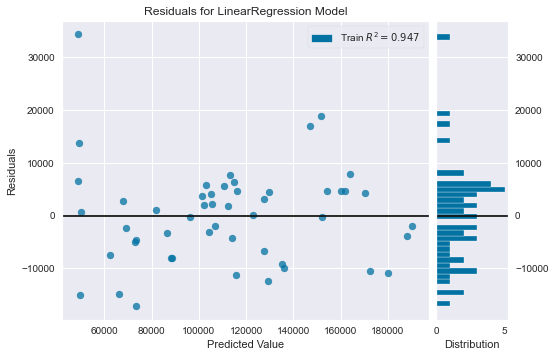

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [510]:
from yellowbrick.regressor import ResidualsPlot 
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()

## Regressão Linear Múltipla

### Criação de variáveis X1 (Marketing Spend e R&D Spend) e y1 (Profit)

In [511]:
X1 = df[['Marketing Spend','R&D Spend']].values
y1 = df['Profit'].values

### Instanciação e fitting

In [512]:
modelo2 = LinearRegression()
modelo2.fit(X1, y1)
#R^2
modelo2.score(X1, y1)

0.9504503015559763

### Renomeando colunas para usar OLS

In [513]:
df.rename(columns={"Marketing Spend":"MKTSPEND","R&D Spend":"RDSPEND"},inplace=True)

In [514]:
modelo_ajustado2 = sm.ols(formula = 'Profit ~ RDSPEND + MKTSPEND', data = df)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.16e-31
Time:                        14:19:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDSPEND        0.7966      0.041     19.266      0.000       0.713       0.880
MKTSPEND       0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prevendo o Profit usando valores de 150.000 investimento em R&D e Marketing

In [515]:
novo = np.array([150000, 100000])
novo = novo.reshape(1, -1)
print(f'Profit de {modelo2.predict(novo)}')

Profit de [131120.44990719]


In [516]:
previsoes1 = modelo2.predict(X1)

In [517]:
y1

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [518]:
previsoes1

array([192800.45862502, 189774.65948019, 181405.37809703, 173441.30884249,
       171127.62321762, 162879.31081217, 158028.13045422, 160455.73887656,
       152317.8036728 , 154343.8139353 , 135011.91472396, 134638.87007529,
       129218.39657898, 127812.20546461, 150192.49179713, 146032.71543309,
       117025.89184753, 130829.44473222, 128882.19882756, 115816.41833283,
       116650.89209156, 118384.17070857, 114990.38463925, 109886.18521692,
       112552.18715137, 102612.90924225, 110990.79288437, 114978.60515008,
       103125.01275975, 102440.42409014,  99085.21956154,  98314.54885378,
        98864.66225433,  97600.73044466,  90262.64121898,  89776.4942853 ,
        75824.23391247,  87974.01451829,  68631.3183233 ,  82924.81527479,
        75049.0560307 ,  74113.88870454,  70234.25057356,  60390.23285206,
        65489.72930769,  47829.57397995,  56909.80085883,  46975.86422072,
        47407.6526018 ,  48326.89446186])

### Plotando Residuals

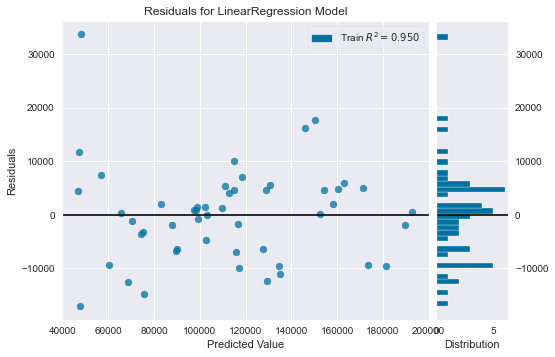

In [519]:
v_residuals = ResidualsPlot(modelo2)
v_residuals.fit(X1, y1)
v_residuals.poof()
plt.show()

<img src="ty.gif" width="100%" />